In [1]:
#Student: Monika Isahakyan
# Assignment 2 


# importing libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn.linear_model 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer


from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import roc_auc_score            # auc score


# CART model packages
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from sklearn.externals.six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects

##########
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


# loading data


original_df = pd.read_excel('Apprentice_Chef_Dataset.xlsx')



# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
original_df.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253


In [2]:
# user-defined functions

#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [3]:
# pulling up data dictionary
original_df_description = pd.read_excel('Apprentice_Chef_Data_Dictionary.xlsx')


# displaying the data dictionary
original_df_description

,Column,Data Type,Description
0,REVENUE,float,Total revenue generated over the first year of a customer's journey
1,CROSS_SELL_SUCCESS,integer,"Success of promoting Halfway There (1 = SUCCESS, 0 = FAIL)"
2,NAME,string,Full name of customer (collected upon initial registration)
3,EMAIL,string,Email of customer (collected upon initial registration)
4,FIRST_NAME,string,First name of customer (collected upon initial registration)
5,FAMILY_NAME,string,Last name of customer (collected upon initial registration)
6,TOTAL_MEALS_ORDERED,integer,Total count of meals ordered per customer account
7,UNIQUE_MEALS_PURCH,integer,Count of unique meal sets ordered per customer account
8,CONTACTS_W_CUSTOMER_SERVICE,integer,"Count of times a customer made contact with customer service (phone, chatbot, or email)"
9,PRODUCT_CATEGORIES_VIEWED,integer,Total number of meal categories viewed (online and mobile platforms combined)


Here we can see all our columns and their meaning. 

I am going to see which columns have missing information. 

Then I will check the outliers for each column and do feature engineering for them.

In [4]:
# checking for missing values
original_df.isnull().sum()

REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
PC_LOGINS                        0
MOBILE_LOGINS                    0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

In [5]:
# saving results
original_df.to_excel('original_df_feature_rich.xlsx',
                 index = False)

# loading saved file
original_df = pd.read_excel('original_df_feature_rich.xlsx')

# Analyzing Outliers

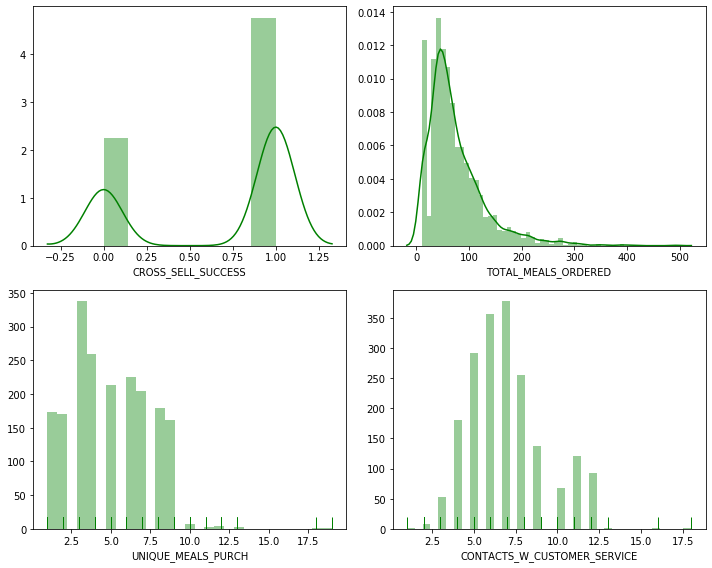

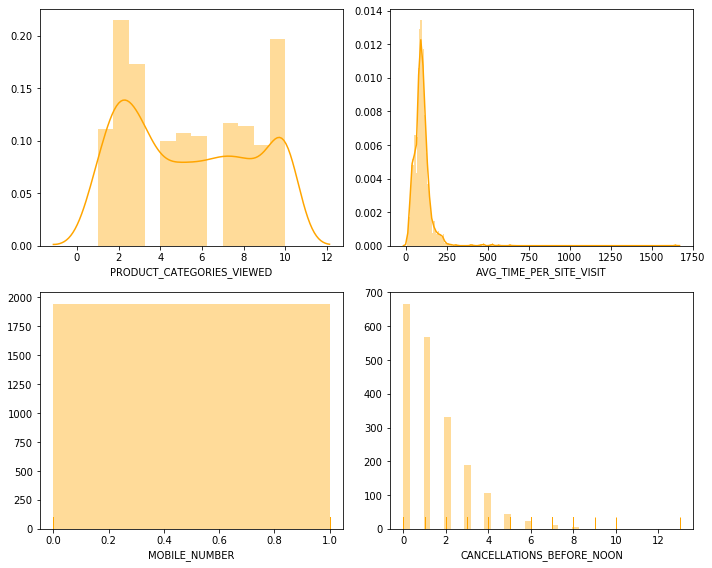

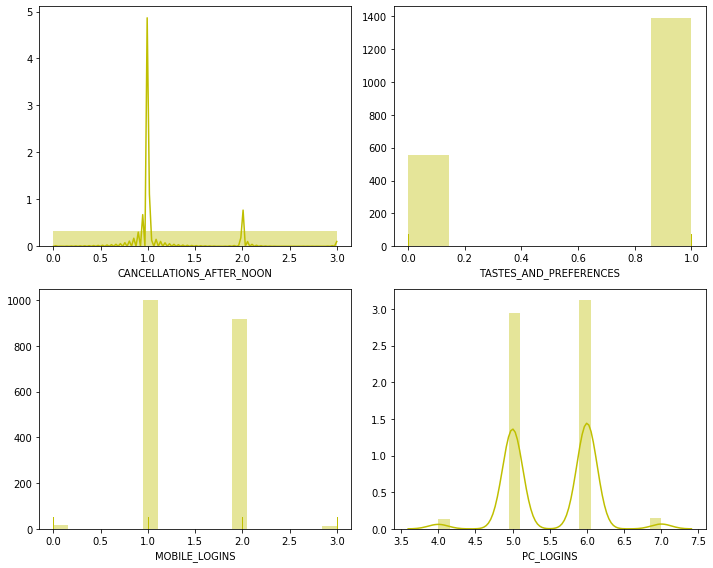

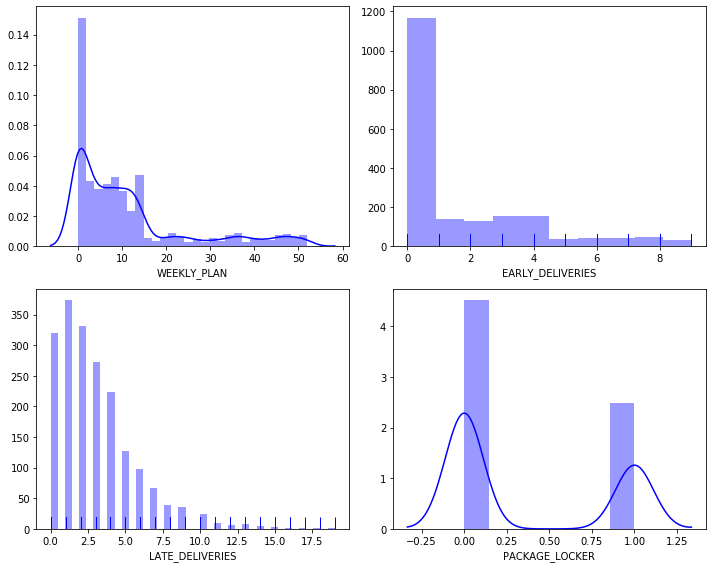

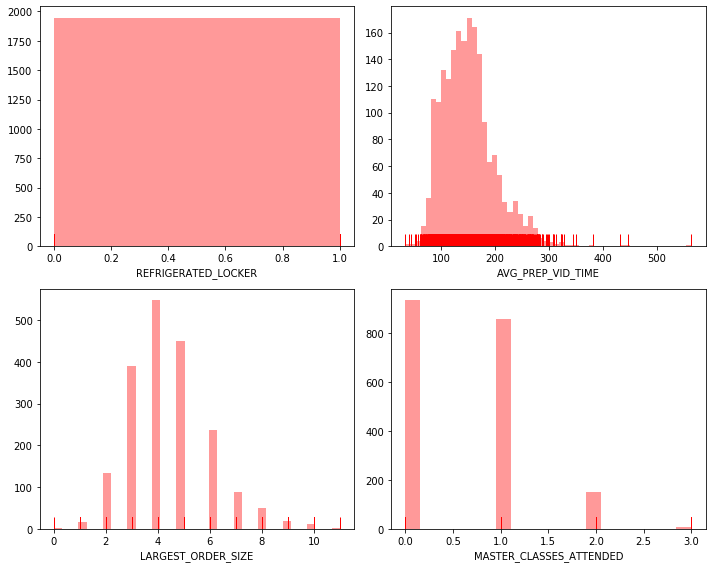

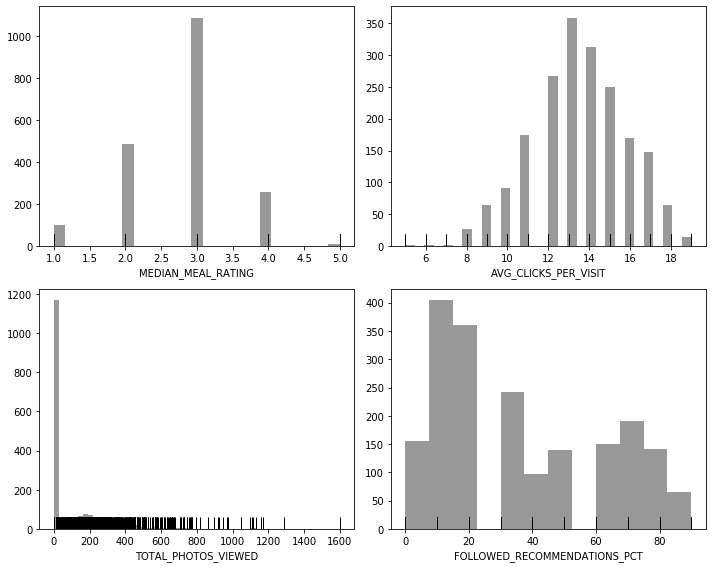

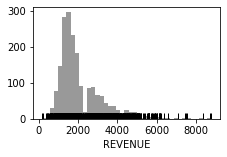

In [6]:
### Visualising EDA (Histograms)  ###########

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['CROSS_SELL_SUCCESS'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'g')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################
plt.subplot(2, 2, 4)
sns.distplot(original_df['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'g')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
plt.tight_layout()
plt.savefig('Apprentice Chef Data Histograms 1 of 6.png')
plt.show()

########################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['MOBILE_NUMBER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('MOBILE_NUMBER')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')
plt.tight_layout()
plt.savefig('Apprentice Chef Data Histograms 2 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'y')
plt.xlabel('TASTES_AND_PREFERENCES')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['MOBILE_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'y')
plt.xlabel('MOBILE_LOGINS')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['PC_LOGINS'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('PC_LOGINS')
plt.tight_layout()
plt.savefig('Apprentice Chef Data Histograms 3 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'blue')
plt.xlabel('WEEKLY_PLAN')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['EARLY_DELIVERIES'],
             bins = 10,
             kde  = False,
             rug  = True,
             color = 'blue')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['LATE_DELIVERIES'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'blue')
plt.xlabel('LATE_DELIVERIES')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['PACKAGE_LOCKER'],
             bins  = 'fd',
             color = 'blue')
plt.xlabel('PACKAGE_LOCKER')
plt.tight_layout()
plt.savefig('Apprentice Chef Data Histograms 4 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['REFRIGERATED_LOCKER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('REFRIGERATED_LOCKER')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('AVG_PREP_VID_TIME')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('LARGEST_ORDER_SIZE')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MASTER_CLASSES_ATTENDED')
plt.tight_layout()
plt.savefig('Apprentice Chef Data Histograms 5 of 6.png')
plt.show()

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'black')
plt.xlabel('MEDIAN_MEAL_RATING')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'black')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'black')
plt.xlabel('TOTAL_PHOTOS_VIEWED')

########################
plt.subplot(2, 2, 4)
sns.distplot(original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'black')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')
plt.tight_layout()
plt.show()
#########################################
plt.subplot(2, 2, 4)
sns.distplot(original_df['REVENUE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'black')
plt.xlabel('REVENUE')
plt.tight_layout()
plt.savefig('Apprentice Chef Data Histograms 6 of 6.png')
plt.show()

In [7]:
# setting outlier thresholds

TOTAL_MEALS_ORDERED_hi            = 200
TOTAL_MEALS_ORDERED_lo            = 0.5
UNIQUE_MEALS_PURCH_hi             = 9
UNIQUE_MEALS_PURCH_lo             = 0.9 
CONTACTS_W_CUSTOMER_SERVICE_hi    = 13
CONTACTS_W_CUSTOMER_SERVICE_lo    = 2
PRODUCT_CATEGORIES_VIEWED_hi      = 10
PRODUCT_CATEGORIES_VIEWED_lo      = 1
AVG_TIME_PER_SITE_VISIT_hi        = 200
CANCELLATIONS_BEFORE_NOON_hi      = 8
CANCELLATIONS_AFTER_NOON_hi       = 3
CANCELLATIONS_AFTER_NOON_lo       = 0.5
WEEKLY_PLAN_hi                    = 50.5
EARLY_DELIVERIES_hi               = 4
LATE_DELIVERIES_hi                = 5
AVG_PREP_VID_TIME_hi              = 300
FOLLOWED_RECOMMENDATIONS_PCT_hi   = 90  
LARGEST_ORDER_SIZE_hi             = 7
LARGEST_ORDER_SIZE_lo             = 2
AVG_CLICKS_PER_VISIT_lo           = 6
AVG_CLICKS_PER_VISIT_hi           = 19
TOTAL_PHOTOS_VIEWED_hi            = 550

CROSS_SELL_SUCCESS_hi     = 1

As we can see the graphs show that there are outliers for each column. I take out the ones that are important for us and created limits for them. Next step we will do feature engineering for this outliers. 

In [8]:
# TOTAL_MEALS_ORDERED
original_df['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]
condition_lo = original_df.loc[0:,'out_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] < TOTAL_MEALS_ORDERED_lo]

original_df['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# UNIQUE_MEALS_PURCH
original_df['out_UNIQUE_MEALS_PURCH'] = 0
condition_hi = original_df.loc[0:,'out_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi]
condition_lo = original_df.loc[0:,'out_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] < UNIQUE_MEALS_PURCH_lo]

original_df['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)



# CONTACTS_W_CUSTOMER_SERVICE
original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = original_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]
condition_lo = original_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_lo]

original_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)

original_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo,
                                        value      = 1,
                                        inplace    = True)

# PRODUCT_CATEGORIES_VIEWED
original_df['out_PRODUCT_CATEGORIES_VIEWED'] = 0
condition_hi = original_df.loc[0:,'out_PRODUCT_CATEGORIES_VIEWED'][original_df['PRODUCT_CATEGORIES_VIEWED'] > PRODUCT_CATEGORIES_VIEWED_hi]
condition_lo = original_df.loc[0:,'out_PRODUCT_CATEGORIES_VIEWED'][original_df['PRODUCT_CATEGORIES_VIEWED'] < PRODUCT_CATEGORIES_VIEWED_lo]

original_df['out_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)

original_df['out_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = condition_lo,
                                        value      = 1,
                                        inplace    = True)



# AVG_TIME_PER_SITE_VISIT
original_df['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = original_df.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]

original_df['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)

# CANCELLATIONS_BEFORE_NOON
original_df['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = original_df.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]

original_df['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)

# CANCELLATIONS_AFTER_NOON
original_df['out_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = original_df.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_hi]
condition_lo = original_df.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] < CANCELLATIONS_AFTER_NOON_lo]

original_df['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# WEEKLY_PLAN
original_df['out_WEEKLY_PLAN'] = 0
condition_hi = original_df.loc[0:,'out_WEEKLY_PLAN'][original_df['WEEKLY_PLAN'] > WEEKLY_PLAN_hi]

original_df['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# EARLY_DELIVERIES
original_df['out_EARLY_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_EARLY_DELIVERIES'][original_df['EARLY_DELIVERIES'] > EARLY_DELIVERIES_hi]

original_df['out_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# LATE_DELIVERIES
original_df['out_LATE_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]

original_df['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# AVG_PREP_VID_TIME
original_df['out_AVG_PREP_VID_TIME'] = 0
condition_hi = original_df.loc[0:,'out_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]

original_df['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


#FOLLOWED_RECOMMENDATIONS_PCT
original_df['out_FOLLOWED_RECOMMENDATIONS_PCT'] = 0
condition_hi = original_df.loc[0:,'out_FOLLOWED_RECOMMENDATIONS_PCT'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] > FOLLOWED_RECOMMENDATIONS_PCT_hi]

original_df['out_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# LARGEST_ORDER_SIZE
original_df['out_LARGEST_ORDER_SIZE'] = 0
condition_hi = original_df.loc[0:,'out_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_hi]
condition_lo = original_df.loc[0:,'out_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] < LARGEST_ORDER_SIZE_lo]

original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# AVG_CLICKS_PER_VISIT
original_df['out_AVG_CLICKS_PER_VISIT'] = 0
condition_hi = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_hi]
condition_lo = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_lo]

original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# TOTAL_PHOTOS_VIEWED
original_df['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_hi]

original_df['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# CROSS_SELL_SUCCESS
original_df['out_CROSS_SELL_SUCCESS'] = 0
condition_hi = original_df.loc[0:,'out_CROSS_SELL_SUCCESS'][original_df['CROSS_SELL_SUCCESS'] > CROSS_SELL_SUCCESS_hi]

original_df['out_CROSS_SELL_SUCCESS'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

#   Developing Trend-Based Features

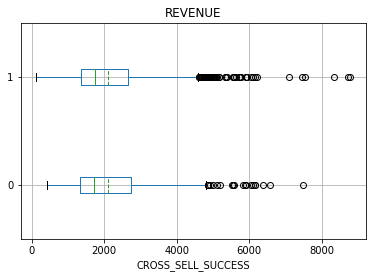

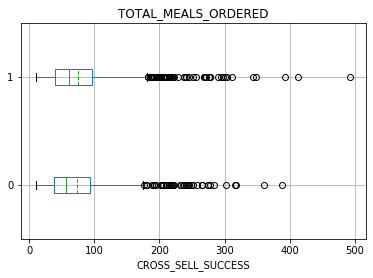

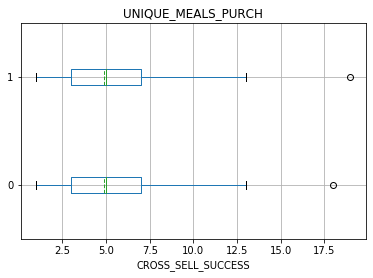

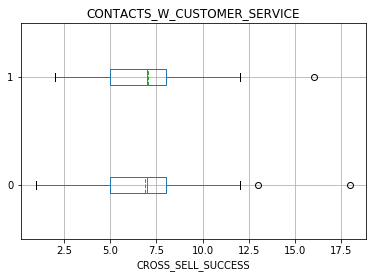

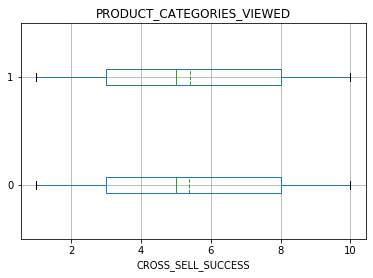

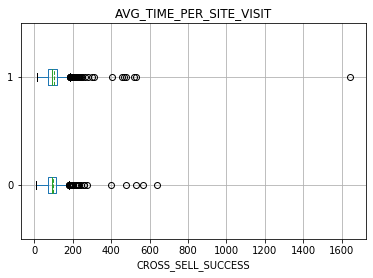

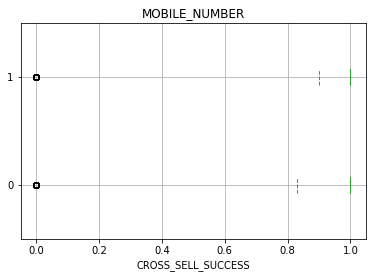

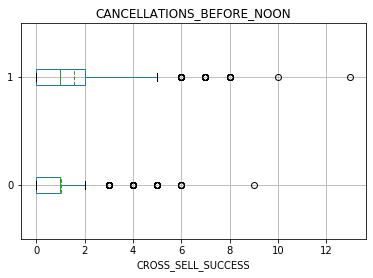

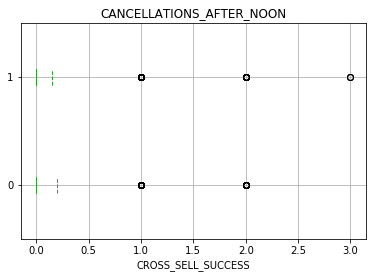

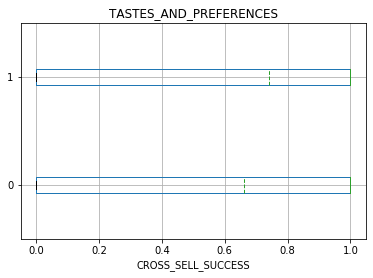

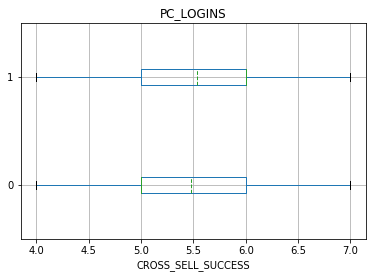

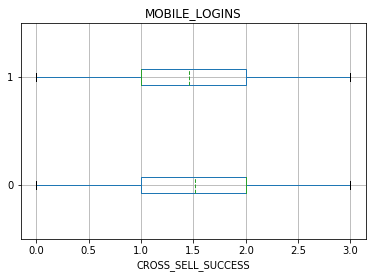

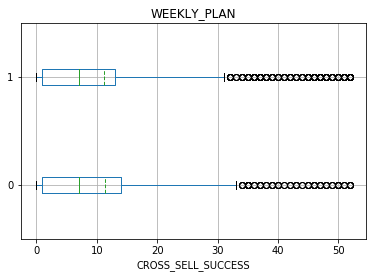

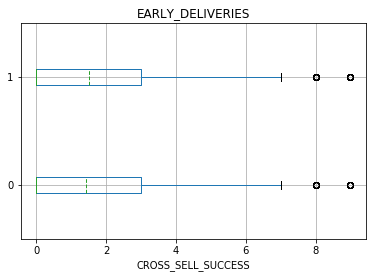

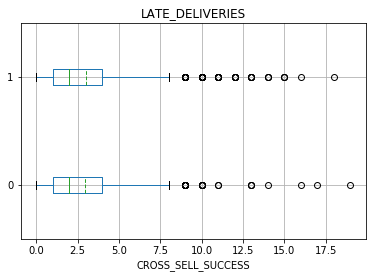

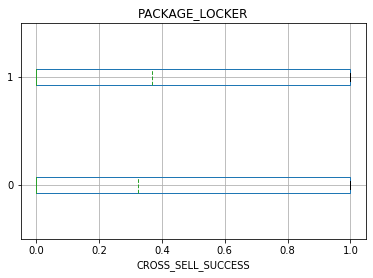

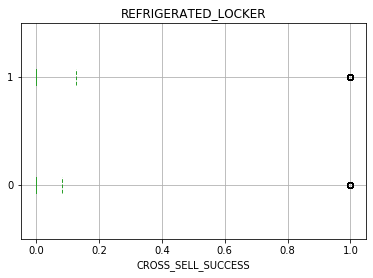

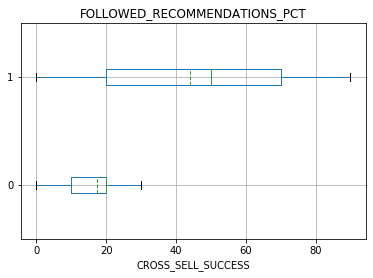

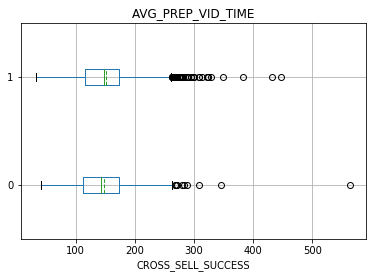

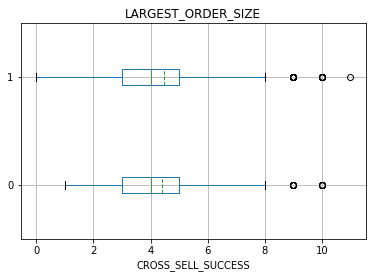

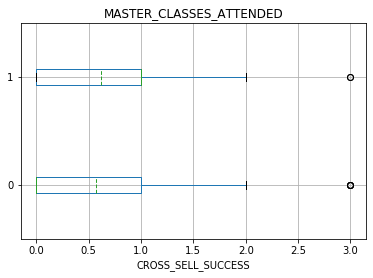

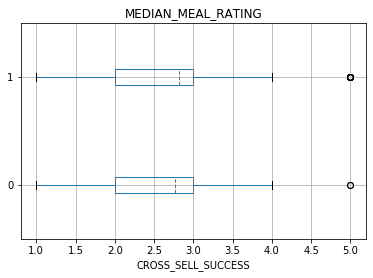

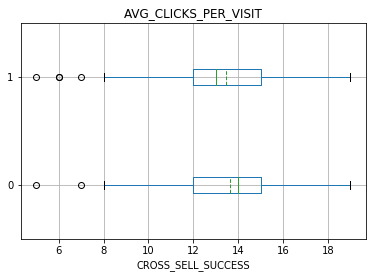

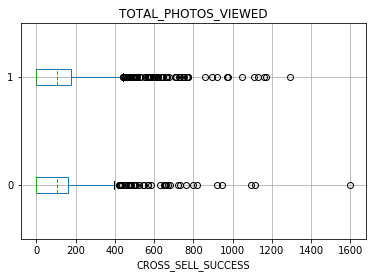

In [9]:
########################
# Visual EDA (Scatterplots)
########################

def categorical_boxplots(response, cat_var, data):

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)

    plt.suptitle("")
    plt.show()


# calling the function for each categorical variable
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'CROSS_SELL_SUCCESS',
					 data     = original_df)


########################################

categorical_boxplots(response = 'TOTAL_MEALS_ORDERED',
					 cat_var  = 'CROSS_SELL_SUCCESS',
					 data     = original_df)

########################################


categorical_boxplots(response = 'UNIQUE_MEALS_PURCH',
					 cat_var  = 'CROSS_SELL_SUCCESS',
					 data     = original_df)

########################################
categorical_boxplots(response = 'CONTACTS_W_CUSTOMER_SERVICE',
					 cat_var  = 'CROSS_SELL_SUCCESS',
					 data     = original_df)

########################################

categorical_boxplots(response = 'PRODUCT_CATEGORIES_VIEWED',
					 cat_var  = 'CROSS_SELL_SUCCESS',
					 data     = original_df)

########################################

categorical_boxplots(response = 'AVG_TIME_PER_SITE_VISIT',
					 cat_var  = 'CROSS_SELL_SUCCESS',
					 data     = original_df)

########################################

categorical_boxplots(response = 'MOBILE_NUMBER',
					 cat_var  = 'CROSS_SELL_SUCCESS',
					 data     = original_df)

########################################

categorical_boxplots(response = 'CANCELLATIONS_BEFORE_NOON',
					 cat_var  = 'CROSS_SELL_SUCCESS',
					 data     = original_df)
########################################

categorical_boxplots(response = 'CANCELLATIONS_AFTER_NOON',
					 cat_var  = 'CROSS_SELL_SUCCESS',
					 data     = original_df)

########################################

categorical_boxplots(response = 'TASTES_AND_PREFERENCES',
					 cat_var  = 'CROSS_SELL_SUCCESS',
					 data     = original_df)
########################################


categorical_boxplots(response = 'PC_LOGINS',
					 cat_var  = 'CROSS_SELL_SUCCESS',
					 data     = original_df)
########################################

categorical_boxplots(response = 'MOBILE_LOGINS',
					 cat_var  = 'CROSS_SELL_SUCCESS',
					 data     = original_df)
########################################

categorical_boxplots(response = 'WEEKLY_PLAN',
					 cat_var  = 'CROSS_SELL_SUCCESS',
					 data     = original_df)

########################################

categorical_boxplots(response = 'EARLY_DELIVERIES',
					 cat_var  = 'CROSS_SELL_SUCCESS',
					 data     = original_df)

########################################

categorical_boxplots(response = 'LATE_DELIVERIES',
					 cat_var  = 'CROSS_SELL_SUCCESS',
					 data     = original_df)

########################################

categorical_boxplots(response = 'PACKAGE_LOCKER',
					 cat_var  = 'CROSS_SELL_SUCCESS',
					 data     = original_df)
########################################

categorical_boxplots(response = 'REFRIGERATED_LOCKER',
					 cat_var  = 'CROSS_SELL_SUCCESS',
					 data     = original_df)

########################################

categorical_boxplots(response = 'FOLLOWED_RECOMMENDATIONS_PCT',
					 cat_var  = 'CROSS_SELL_SUCCESS',
					 data     = original_df)

########################################

categorical_boxplots(response = 'AVG_PREP_VID_TIME',
					 cat_var  = 'CROSS_SELL_SUCCESS',
					 data     = original_df)

########################################

categorical_boxplots(response = 'LARGEST_ORDER_SIZE',
					 cat_var  = 'CROSS_SELL_SUCCESS',
					 data     = original_df)

########################################

categorical_boxplots(response = 'MASTER_CLASSES_ATTENDED',
					 cat_var  = 'CROSS_SELL_SUCCESS',
					 data     = original_df)
########################################

categorical_boxplots(response = 'MEDIAN_MEAL_RATING',
					 cat_var  = 'CROSS_SELL_SUCCESS',
					 data     = original_df)

########################################

categorical_boxplots(response = 'AVG_CLICKS_PER_VISIT',
					 cat_var  = 'CROSS_SELL_SUCCESS',
					 data     = original_df)

########################################

categorical_boxplots(response = 'TOTAL_PHOTOS_VIEWED',
					 cat_var  = 'CROSS_SELL_SUCCESS',
					 data     = original_df)



In [10]:
TOTAL_MEALS_ORDERED_hi  = 300 
UNIQUE_MEALS_PURCH_hi = 10
CONTACTS_W_CUSTOMER_SERVICE_hi  = 10
AVG_TIME_PER_SITE_VISIT_hi = 350 
CANCELLATIONS_BEFORE_NOON_hi = 8 
CANCELLATIONS_AFTER_NOON_hi    = 2.0 
LATE_DELIVERIES_hi    = 11 
AVG_PREP_VID_TIME_hi = 300 
TOTAL_PHOTOS_VIEWED_hi  =  590

In [11]:
# developing features for outliers
               

# Total Meals Ordered
original_df['change_TOTAL_MEALS_ORDERED'] = 0
condition = original_df.loc[0:,'change_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]

original_df['change_TOTAL_MEALS_ORDERED'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)



# Unique Meals Purchased
original_df['change_UNIQUE_MEALS_PURCH'] = 0
condition = original_df.loc[0:,'change_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi]

original_df['change_UNIQUE_MEALS_PURCH'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


# Contacts with Customer Service
original_df['change_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition = original_df.loc[0:,'change_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]

original_df['change_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Average time per visit
original_df['change_AVG_TIME_PER_SITE_VISIT'] = 0
condition = original_df.loc[0:,'change_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]

original_df['change_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Cancellations Before Noon
original_df['change_CANCELLATIONS_BEFORE_NOON'] = 0
condition = original_df.loc[0:,'change_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]

original_df['change_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Cancellations After Noon
original_df['change_CANCELLATIONS_AFTER_NOON'] = 0
condition = original_df.loc[0:,'change_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_hi]

original_df['change_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Late Deliveries
original_df['change_LATE_DELIVERIES'] = 0
condition = original_df.loc[0:,'change_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]

original_df['change_LATE_DELIVERIES'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Average Prep Vid Time
original_df['change_AVG_PREP_VID_TIME'] = 0
condition = original_df.loc[0:,'change_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]

original_df['change_AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Total Photos Viewed
original_df['change_TOTAL_PHOTOS_VIEWED'] = 0
condition = original_df.loc[0:,'change_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_hi]

original_df['change_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)



We Developed thresholds at points where the trend changes with the help of boxplot as it better shows. We defined trasholders and did feature engineering for them. 

Let's save  the dataset and drop the columns we are not going to use in our models.  

In [12]:
# making a copy of dataset
original_df_explanatory = original_df.copy()


# dropping Revenue and other variables we think does not make big change from the explanatory variable set
original_df_dropped = original_df.drop(columns=['NAME', 'FIRST_NAME', 'FAMILY_NAME', 'EMAIL'])


# formatting each explanatory variable for statsmodels
for val in original_df_explanatory:
    print(f"original_df['{val}'] +")

original_df['REVENUE'] +
original_df['CROSS_SELL_SUCCESS'] +
original_df['NAME'] +
original_df['EMAIL'] +
original_df['FIRST_NAME'] +
original_df['FAMILY_NAME'] +
original_df['TOTAL_MEALS_ORDERED'] +
original_df['UNIQUE_MEALS_PURCH'] +
original_df['CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['PRODUCT_CATEGORIES_VIEWED'] +
original_df['AVG_TIME_PER_SITE_VISIT'] +
original_df['MOBILE_NUMBER'] +
original_df['CANCELLATIONS_BEFORE_NOON'] +
original_df['CANCELLATIONS_AFTER_NOON'] +
original_df['TASTES_AND_PREFERENCES'] +
original_df['PC_LOGINS'] +
original_df['MOBILE_LOGINS'] +
original_df['WEEKLY_PLAN'] +
original_df['EARLY_DELIVERIES'] +
original_df['LATE_DELIVERIES'] +
original_df['PACKAGE_LOCKER'] +
original_df['REFRIGERATED_LOCKER'] +
original_df['FOLLOWED_RECOMMENDATIONS_PCT'] +
original_df['AVG_PREP_VID_TIME'] +
original_df['LARGEST_ORDER_SIZE'] +
original_df['MASTER_CLASSES_ATTENDED'] +
original_df['MEDIAN_MEAL_RATING'] +
original_df['AVG_CLICKS_PER_VISIT'] +
original_df['TOTAL_PHOTO

In [13]:
###Stratification,, Declare the explanatory variables (chef_df_data)
##response variable as (chef_df_target)

# declaring explanatory variables
original_df_dropped_data = original_df.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
original_df_dropped_target = original_df.loc[ : , 'CROSS_SELL_SUCCESS']


In [14]:
# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            original_df_dropped_data,
            original_df_dropped_target,
            test_size = 0.25,
            random_state = 222,
            stratify = original_df_dropped_target)


# merging training data for statsmodels
original_df_dropped_train = pd.concat([X_train, y_train], axis = 1)

In [26]:
##Build a logistic regression model

# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~
                                        REVENUE +                   
TOTAL_MEALS_ORDERED +             
UNIQUE_MEALS_PURCH   +            
CONTACTS_W_CUSTOMER_SERVICE +      
PRODUCT_CATEGORIES_VIEWED  +      
AVG_TIME_PER_SITE_VISIT     +     
MOBILE_NUMBER                +    
CANCELLATIONS_BEFORE_NOON     +   
CANCELLATIONS_AFTER_NOON       +  
TASTES_AND_PREFERENCES          + 
PC_LOGINS                       + 
MOBILE_LOGINS   +
WEEKLY_PLAN     +        
EARLY_DELIVERIES +                
LATE_DELIVERIES +               
PACKAGE_LOCKER +                  
REFRIGERATED_LOCKER +              
FOLLOWED_RECOMMENDATIONS_PCT +     
AVG_PREP_VID_TIME +              
LARGEST_ORDER_SIZE +              
MASTER_CLASSES_ATTENDED +         
MEDIAN_MEAL_RATING +             
AVG_CLICKS_PER_VISIT +            
TOTAL_PHOTOS_VIEWED +
change_TOTAL_MEALS_ORDERED +
change_TOTAL_MEALS_ORDERED +
change_UNIQUE_MEALS_PURCH +
change_CONTACTS_W_CUSTOMER_SERVICE +
change_AVG_TIME_PER_SITE_VISIT +
change_CANCELLATIONS_BEFORE_NOON +
change_CANCELLATIONS_AFTER_NOON +
change_LATE_DELIVERIES +
change_AVG_PREP_VID_TIME +
change_TOTAL_PHOTOS_VIEWED
""",
                                data = original_df_dropped_train)



         
# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

         Current function value: 0.464790
         Iterations: 35


C:\Users\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1425
Method:                           MLE   Df Model:                           33
Date:                Sun, 15 Mar 2020   Pseudo R-squ.:                  0.2598
Time:                        21:27:22   Log-Likelihood:                -678.13
converged:                      False   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 5.788e-80
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -0.6341      1.473     -0.430      0.667      -3.521       2.253
REVENUE                               -0.0001      0.000     -1.329      0.184      -0.000    6.69e-05
TOTAL_MEALS_ORDERED                    0.0018      0.002      1.027      0.305      -0.002       0.005
UNIQUE_MEALS_PURCH                     0.0002      0.029      0.007      0.994      -0.056       0.057
CONTACTS_W_CUSTOMER_SERVICE            0.0490      0.050      0.972      0.331      -0.050       0.148
PRODUCT_CATEGORIES_VIEWED              0.0039      0.022      0.176      0.860      -0.040       0.048
AVG_TIME_PER_SITE_VISIT                0.0027      0.001      1.839      0.066      -0.000       0.006
MOBILE_NUMBER                          0.6784      0.199      3.404      0.001       0.288       1.069
CANCELLATIONS_BEFORE_NOON              0.2670      0.050      5.307      0.000       0.168       0.366
CANCELLATIONS_AFTER_NOON              -0.2914      0.159     -1.837      0.066      -0.602       0.019
TASTES_AND_PREFERENCES                 0.3539      0.147      2.414      0.016       0.067       0.641
PC_LOGINS                              0.0713      0.114      0.628      0.530      -0.151       0.294
MOBILE_LOGINS                         -0.3635      0.127     -2.865      0.004      -0.612      -0.115
WEEKLY_PLAN                            0.0027      0.005      0.547      0.584      -0.007       0.012
EARLY_DELIVERIES                       0.0409      0.030      1.365      0.172      -0.018       0.100
LATE_DELIVERIES                        0.0264      0.028      0.957      0.338      -0.028       0.081
PACKAGE_LOCKER                        -0.1207      0.159     -0.758      0.448      -0.433       0.191
REFRIGERATED_LOCKER                    0.3951      0.252      1.568      0.117      -0.099       0.889
FOLLOWED_RECOMMENDATIONS_PCT           0.0578      0.004     14.970      0.000       0.050       0.065
AVG_PREP_VID_TIME                     -0.0006      0.003     -0.194      0.847      -0.007       0.006
LARGEST_ORDER_SIZE                     0.0270      0.075      0.359      0.719      -0.120       0.174
MASTER_CLASSES_ATTENDED                0.1067      0.124      0.858      0.391      -0.137       0.350
MEDIAN_MEAL_RATING                    -0.2063      0.185     -1.116      0.265      -0.569       0.156
AVG_CLICKS_PER_VISIT                  -0.1012      0.056     -1.814      0.070      -0.210       0.008
TOTAL_PHOTOS_VIEWED                    0.0005      0.001      0.856      0.392      -0.001       0.002
change_TOTAL_MEALS_ORDERED            -1.0796      0.885     -1.220      0.223      -2.815       0.655
change_UNIQUE_MEALS_PURCH             -0.2984      1.005     -0.297      0.766      -2.268       1.671
change_CONTACTS_W_CUSTOMER_SERVICE    -0.4700      0.408     -1.151      0.250      -1.270       0.331
change_AVG_TIME_PER_SITE_VISIT        -1.5030   

When I try to add my trashholders here I am having error, I added the ones from boxplot which worked however their p-value is not significate to add it in our logistic_sig. Therefore I will continue with the data I have.

In [27]:
##Build a logistic regression model (significant variables)

# instantiating a logistic regression model object
logistic_sig = smf.logit(formula = """ CROSS_SELL_SUCCESS ~
                                        MOBILE_NUMBER +
                                        CANCELLATIONS_BEFORE_NOON +
                                        TASTES_AND_PREFERENCES +
                                        MOBILE_LOGINS +
                                        FOLLOWED_RECOMMENDATIONS_PCT
""",
                                        data    = original_df_dropped_train)



# fitting the model object
results_sig = logistic_sig.fit()


# checking the results SUMMARY
results_sig.summary()

Optimization terminated successfully.
         Current function value: 0.476902
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1453
Method:                           MLE   Df Model:                            5
Date:                Sun, 15 Mar 2020   Pseudo R-squ.:                  0.2406
Time:                        21:29:40   Log-Likelihood:                -695.80
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 4.770e-93
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -1.5238      0.298     -5.120      0.000      -2.107      -0.941
MOBILE_NUMBER                    0.6732      0.193      3.481      0.000       0.294       1.052
CANCELLATIONS_BEFORE_NOON        0.2405      0.048      5.040      0.000       0.147       0.334
TASTES_AND_PREFERENCES           0.3362      0.142      2.362      0.018       0.057       0.615
MOBILE_LOGINS                   -0.3043      0.123     -2.477      0.013      -0.545      -0.064
FOLLOWED_RECOMMENDATIONS_PCT     0.0560      0.004     15.061      0.000       0.049       0.063
================================================================================================
"""

In [28]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=802,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 802
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [29]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['REVENUE', 'TOTAL_MEALS_ORDERED', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 
                   'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED','PRODUCT_CATEGORIES_VIEWED', 
                   'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 
                   'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON',
                  'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES',
                  'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT',
                  'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 
                  'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'],
    
 
 # significant variables only
 'logit_sig'    : ['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'FOLLOWED_RECOMMENDATIONS_PCT']

}

In [31]:
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

Now that we defined our optimal neighbors number and created our dictionary for using in our models let's start trying different models.

Let's split data into train and test and use it for logistic regression 

In [32]:
# train/test split with the full model
original_df_dropped_data   =  original_df_dropped.loc[ : , candidate_dict['logit_sig']]
original_df_dropped_target =  original_df_dropped.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            original_df_dropped_data,
            original_df_dropped_target,
            random_state = 802,
            test_size    = 0.25,
            stratify     = original_df_dropped_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 222)


# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))

Training ACCURACY: 0.706
Testing  ACCURACY: 0.7269


In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

Creating a confusion matrix and visualizing it 


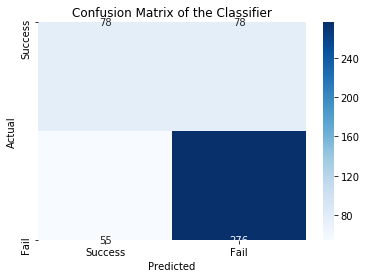

In [35]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Success', 'Fail'])

From graph we can see that the highest value has the one that Fails in both parts, which is 276. 

In [41]:
# area under the roc curve (auc)
roc_auc_score(y_true  = y_test,
              y_score = logreg_pred)

0.6669184290030212

In [42]:
# creating an empty list
model_performance = [['Model', 'Training Accuracy',
                      'Testing Accuracy', 'AUC Value']]


# train accuracy
logreg_train_acc  = logreg_fit.score(X_train, y_train).round(4)


# test accuracy
logreg_test_acc   = logreg_fit.score(X_test, y_test).round(4)


# auc value
logreg_auc = roc_auc_score(y_true  = y_test,
                           y_score = logreg_pred).round(4)


# saving the results
model_performance.append(['Logistic Regression',
                          logreg_train_acc,
                          logreg_test_acc,
                          logreg_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.706, 0.7269, 0.6669]


# Measuring Another Classification Model Type / KNN

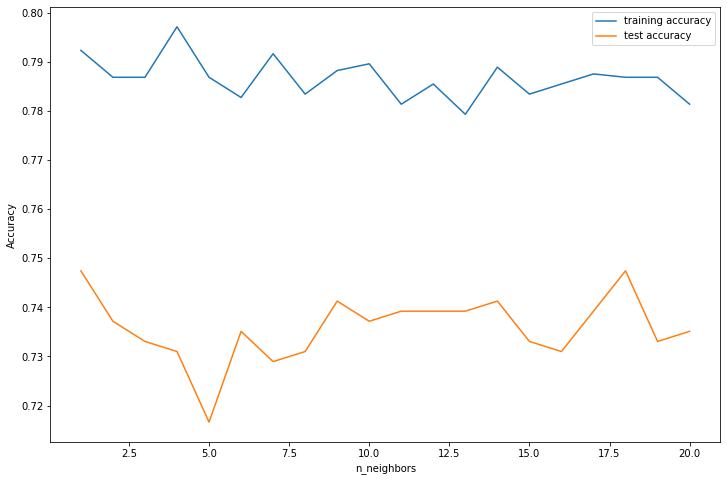

The optimal number of neighbors is: 1


In [43]:
from sklearn.neighbors import KNeighborsClassifier
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(X_data = original_df_dropped_data,
                                  y_data = original_df_dropped_target,
                                  response_type= 'class')

We can see that the number of neighbour is : 1 

In [44]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(original_df_dropped_data)


# TRANSFORMING the data
X_scaled     = scaler.transform(original_df_dropped_data)


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) 


# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            X_scaled_df,
            original_df_dropped_target,
            random_state = 802,
            test_size = 0.25,
            stratify = original_df_dropped_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(X_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(X_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(X_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))

Training ACCURACY: 0.7889
Testing  ACCURACY: 0.7741
AUC Score        : 0.761


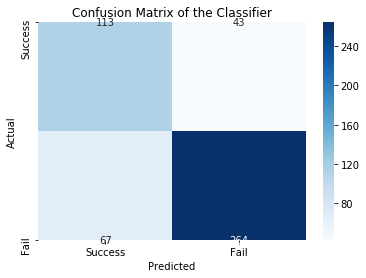

In [48]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['Success', 'Fail'])

In [49]:
# train accuracy
knn_train_acc = knn_fit.score(X_train_scaled, y_train_scaled).round(4)


# test accuracy
knn_test_acc  = knn_fit.score(X_test_scaled, y_test_scaled).round(4)


# auc value
knn_auc       = roc_auc_score(y_true  = y_test_scaled,
                              y_score = knn_pred).round(4)


# saving the results
model_performance.append(['KNN Classification',
                          knn_train_acc,
                          knn_test_acc,
                          knn_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.706, 0.7269, 0.6669]
['KNN Classification', 0.7889, 0.7741, 0.761]
['KNN Classification', 0.7889, 0.7741, 0.761]


# Classification Trees (CART Models)

In [52]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [53]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(X_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', full_tree_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', full_tree_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_tree_pred).round(4))

Training ACCURACY: 0.8197
Testing  ACCURACY: 0.7598
AUC Score        : 0.7419


We run the classification tree model and got our scores for training 0.81 and testing 0.75. However we can see a bit over fitting here. Next I will check the accuracy of the train data show the model graphically to have better understanding and better see the outcome. 

In [70]:
# train accuracy
full_tree_train_acc = full_tree_fit.score(X_train, y_train).round(4)


# test accuracy
full_tree_test_acc  = full_tree_fit.score(X_test, y_test).round(4)


# auc value
full_tree_auc       = roc_auc_score(y_true  = y_test,
                                    y_score = full_tree_pred).round(4)


# saving the results
model_performance.append(['Full Tree',
                          full_tree_train_acc,
                          full_tree_test_acc,
                          full_tree_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.7149, 0.7002, 0.4641]
['KNN Classification', 0.7889, 0.7741, 0.761]
['Full Tree', 0.8095, 0.7906, 0.4778]
['Full Tree', 0.8095, 0.7906, 0.4778]


Training ACCURACY: 0.7827
Testing  ACCURACY: 0.7844
AUC Score        : 0.7906


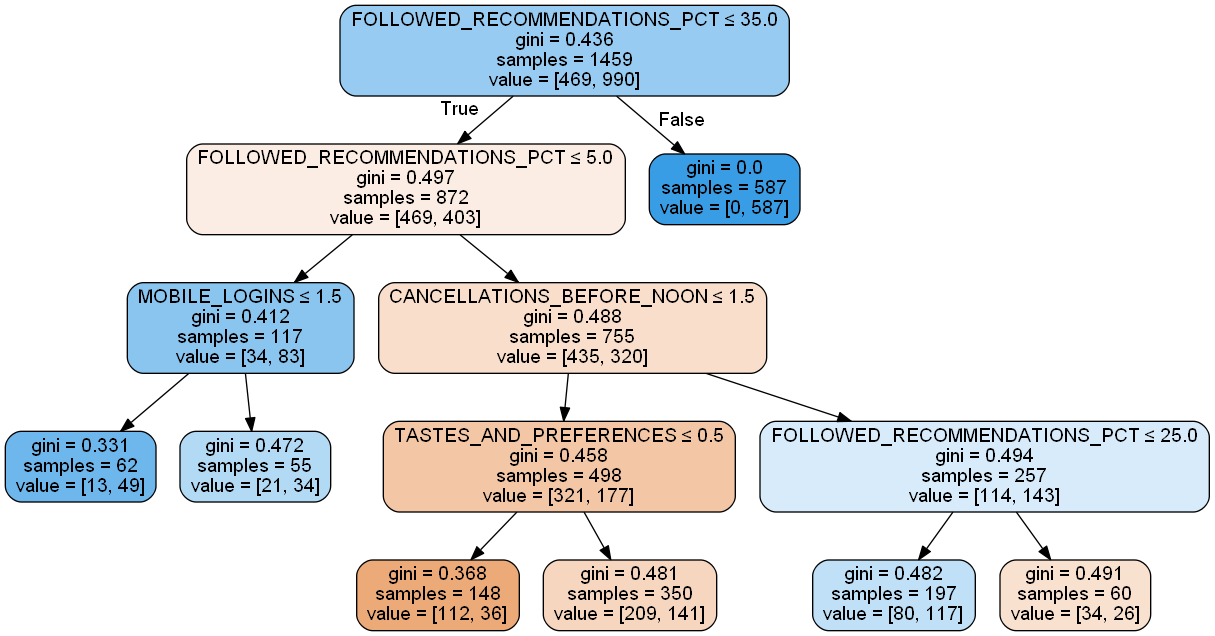

In [54]:
# INSTANTIATING a classification tree object
tree_pruned      = DecisionTreeClassifier(max_depth = 4,
                                          min_samples_leaf = 25,
                                          random_state = 802)


# FITTING the training data
tree_pruned_fit  = tree_pruned.fit(X_train, y_train)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4))


# calling display_tree
display_tree(tree       = tree_pruned_fit,
             feature_df = X_train)


Let's run  the user-defined function to see which variables the model found most important.

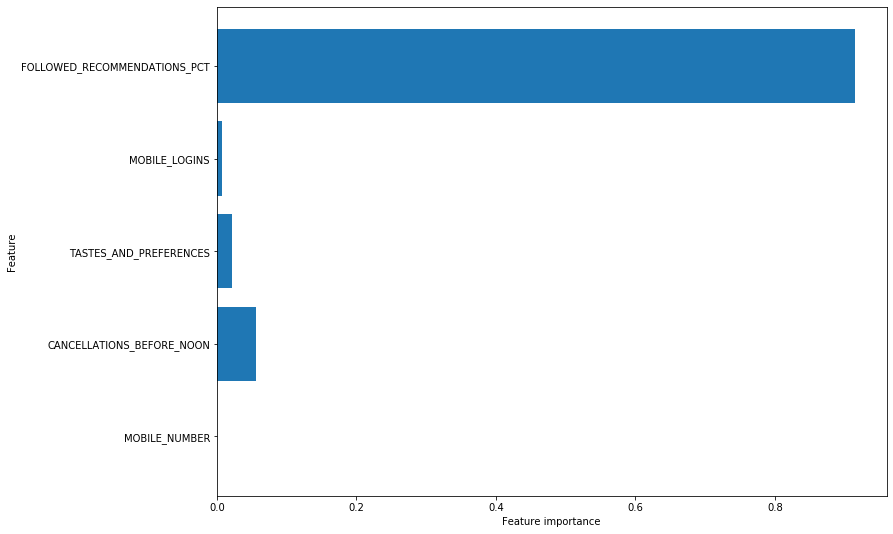

In [56]:
# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train = X_train,
                         export = False)

As we can see followed_recommondation_pct and cancellation_before_noon seems to be the most variables

In [162]:
# train accuracy
p_tree_train_acc = tree_pruned_fit.score(X_train, y_train).round(4)

KNeighborsClassifier
# test accuracy
p_tree_test_acc  = tree_pruned_fit.score(X_test, y_test).round(4)


# auc value
p_tree_auc       = roc_auc_score(y_true  = y_test,
                                 y_score = tree_pred).round(4)


# saving the results
model_performance.append(['Pruned Tree',
                          p_tree_train_acc,
                          p_tree_test_acc,
                          p_tree_auc])


# converting to DataFrame and checking the results
pd.DataFrame(model_performance[1:], columns = model_performance[0])

,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Logistic Regression,0.7060,0.7269,0.6669
1,KNN Classification,0.7889,0.7741,0.7610
2,Pruned Tree,0.7827,0.7844,0.7906


In [41]:
# declaring a DataFrame object
model_performance_df = pd.DataFrame(model_performance[1:], columns = model_performance[0])


# saving the DataFrame to Excel
model_performance_df.to_excel('Classification Model Performance.xlsx',
                              index = False)

# Hyperparameter Tuning

In [164]:
########################################
# loading data and setting display options
########################################
# loading model performance
model_performance = pd.read_excel('Classification Model Performance.xlsx')

#Checking Previous Model
model_performance

,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Logistic Regression,0.7060,0.7269,0.6669
1,KNN Classification,0.7889,0.7741,0.7610
2,Full Tree,0.8197,0.7598,0.7419
3,Pruned Tree,0.7827,0.7844,0.7906
4,Tuned LR,0.7108,0.7084,0.6618
5,Tuned Tree,0.7868,0.7721,0.7612


Yet from the all models used I can conclude that the best one is Tuned Tree with the AUC of 0.7612

# Logistic Regression with Default Hyperparameters

In [165]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 802)

In [166]:
# FITTING the training data
lr_default_fit = lr_default.fit(X_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))

Training ACCURACY: 0.706
Testing  ACCURACY: 0.7269
AUC Score        : 0.6669


In [169]:

########################################
# GridSearchCV
########################################

# declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 3.0, 0.1)
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(solver = 'lbfgs',
                              random_state = 802)


# GridSearchCV object
lr_tuned_cv = GridSearchCV(estimator  = lr_tuned,
                           param_grid = param_grid,
                           cv         = 3,
                           scoring    = make_scorer(roc_auc_score,
                                                    needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(original_df_dropped_data, original_df_dropped_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

Tuned Parameters  : {'C': 0.2, 'warm_start': True}
Tuned CV AUC      : 0.5641


In [170]:
lr_tuned_cv.best_estimator_

LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=802, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=True)

In [171]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = lr_tuned_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(X_test)


# SCORING the results
print('Training ACCURACY:', lr_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', lr_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))

Training ACCURACY: 0.7039
Testing  ACCURACY: 0.729
AUC Score        : 0.6837


In [38]:
# declaring model performance objects
lr_train_acc = lr_tuned.score(X_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(X_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance_tunned = model_performance.append(
                          {'Model'             : 'Tuned LR',
                          'Training Accuracy'  : lr_train_acc,
                          'Testing Accuracy'   : lr_test_acc,
                          'AUC Value'          : lr_auc},
                          ignore_index = True)


# checking the results
model_performance_tunned

NameError: name 'lr_tuned' is not defined

# Hyperparameter Tuning on Classification Trees

In [173]:
# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space = ['best', 'random']
depth_space = pd.np.arange(1, 25)
leaf_space  = pd.np.arange(1, 100)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 222)


# GridSearchCV object
tuned_tree_cv = GridSearchCV(estimator  = tuned_tree,
                             param_grid = param_grid,
                             cv         = 3,
                             scoring    = make_scorer(roc_auc_score,
                                                      needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(original_df_dropped_data, original_df_dropped_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 40, 'splitter': 'best'}
Tuned Training AUC: 0.6779


In [174]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(X_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))

Training ACCURACY: 0.7827
Testing  ACCURACY: 0.7844
AUC Score        : 0.7906


In [175]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(X_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(X_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'Tuned Tree',
                          'Training Accuracy'  : tree_train_acc,
                          'Testing Accuracy'   : tree_test_acc,
                          'AUC Value'          : tree_auc},
                          ignore_index = True)


# checking the results
model_performance

,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Logistic Regression,0.7060,0.7269,0.6669
1,KNN Classification,0.7889,0.7741,0.7610
2,Full Tree,0.8197,0.7598,0.7419
3,Pruned Tree,0.7827,0.7844,0.7906
4,Tuned LR,0.7108,0.7084,0.6618
5,Tuned Tree,0.7868,0.7721,0.7612
6,Tuned LR,0.7039,0.7290,0.6837
7,Tuned Tree,0.7827,0.7844,0.7906


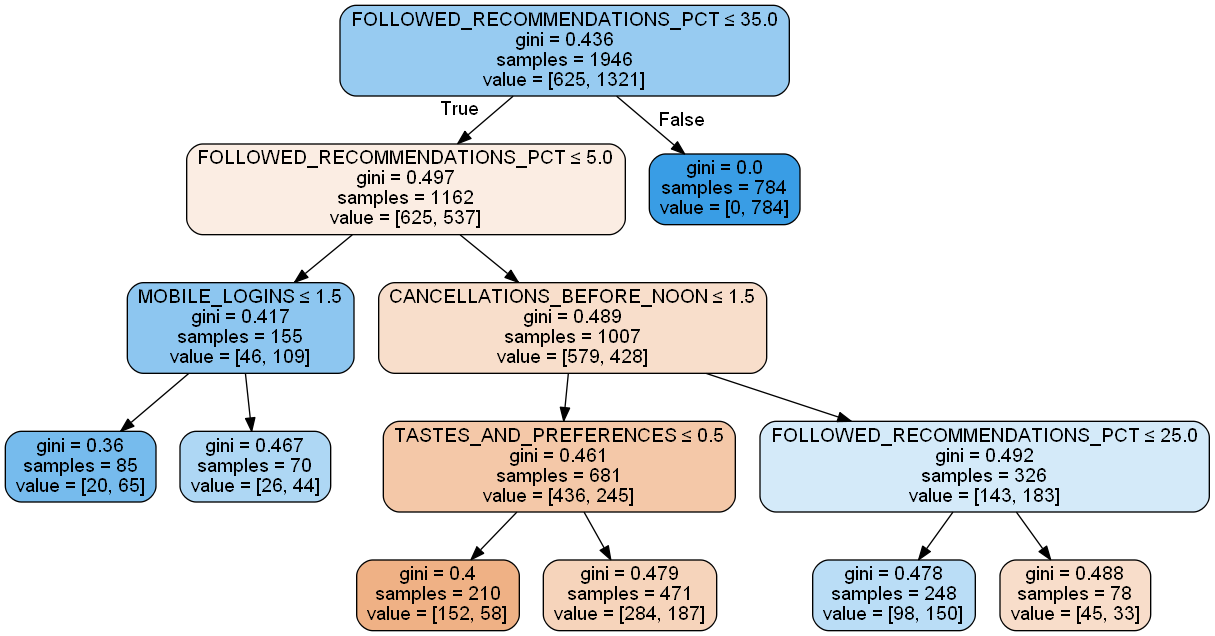

In [177]:
# displaying the tree
display_tree(tree = tree_tuned,
             feature_df = original_df_dropped_data,
             height = 2000,
             width  = 2000)

In [104]:
# saving the DataFrame to Excel
model_performance.to_excel('Classification Model Performance.xlsx',
                           index = False)

# Random Forest

In [178]:
########################################
# importing packages
########################################
import matplotlib.pyplot as plt                      # data visualization
import pandas as pd                                  # data science essentials
from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.model_selection import GridSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer


# new packages
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

In [179]:
########################################
# loading data and setting display options
########################################
# loading model performance
model_performance = pd.read_excel('Classification Model Performance.xlsx')

#Checking Previous Model
model_performance

,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Logistic Regression,0.7060,0.7269,0.6669
1,KNN Classification,0.7889,0.7741,0.7610
2,Full Tree,0.8197,0.7598,0.7419
3,Pruned Tree,0.7827,0.7844,0.7906
4,Tuned LR,0.7108,0.7084,0.6618
5,Tuned Tree,0.7868,0.7721,0.7612


In [180]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Feature_Importance.png')

In [181]:
# train/test split with the logit_sig variables
original_df_dropped_data   =  original_df_dropped.loc[ : , candidate_dict['logit_sig']]
original_df_dropped_target =  original_df_dropped.loc[ : , 'CROSS_SELL_SUCCESS']


# train/test split
X_train, X_test, y_train, y_test = train_test_split(
            original_df_dropped_data,
            original_df_dropped_target,
            random_state = 222,
            test_size    = 0.25,
            stratify     = original_df_dropped_target)

In [182]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 10,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 222)

In [183]:
# FITTING the training data
rf_default_fit = rf_default.fit(X_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.8273
Testing  ACCURACY: 0.7248
AUC Score        : 0.6857


When we use random forest mode, even though the values are high, the data is overfiting which is not good for using it. when we plot bellow we see the most important values according to this model.

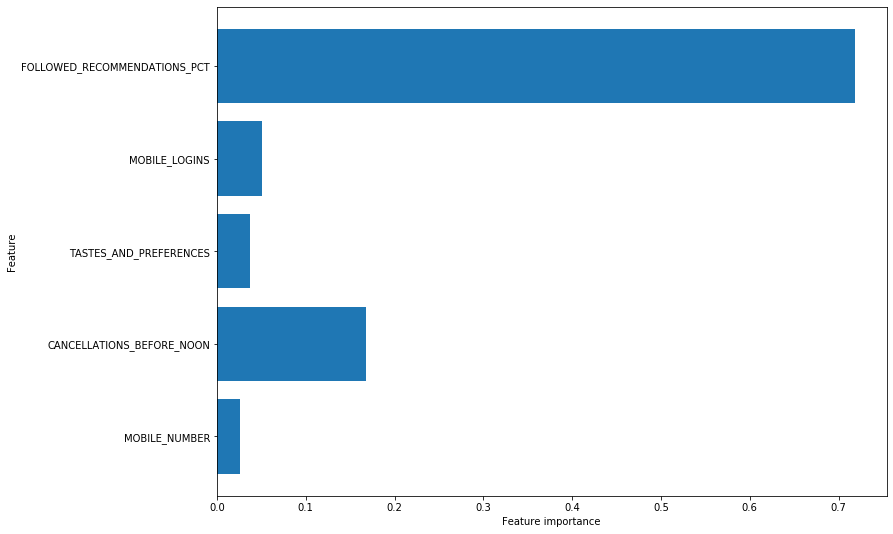

In [184]:
plot_feature_importances(rf_default_fit,
                         train = X_train,
                         export = False)

This model also considers the most important fallowed_recommondations_pct and cancellations_before_noon. 

In [128]:
print(model_performance)

                 Model  Training Accuracy  Testing Accuracy  AUC Value
0  Logistic Regression             0.7060            0.7269     0.6669
1   KNN Classification             0.7889            0.7741     0.7610
2            Full Tree             0.8197            0.7598     0.7419
3          Pruned Tree             0.7827            0.7844     0.7906
4             Tuned LR             0.7108            0.7084     0.6618
5           Tuned Tree             0.7868            0.7721     0.7612


In [185]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(X_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(X_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'Random Forest',
                          'Training Accuracy'  : rf_train_acc,
                          'Testing Accuracy'   : rf_test_acc,
                          'AUC Value'          : rf_auc},
                          ignore_index = True)


# checking the results
model_performance

,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Logistic Regression,0.7060,0.7269,0.6669
1,KNN Classification,0.7889,0.7741,0.7610
2,Full Tree,0.8197,0.7598,0.7419
3,Pruned Tree,0.7827,0.7844,0.7906
4,Tuned LR,0.7108,0.7084,0.6618
5,Tuned Tree,0.7868,0.7721,0.7612
6,Random Forest,0.8273,0.7248,0.6857


In [197]:
# train/test split with the logit_sig variables
original_df_dropped_data   =  original_df_dropped.loc[ : , candidate_dict['logit_full']]
original_df_dropped_target =  original_df_dropped.loc[ : , 'CROSS_SELL_SUCCESS']


# train/test split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
            original_df_dropped_data,
            original_df_dropped_target,
            random_state = 802,
            test_size    = 0.25,
            stratify     = original_df_dropped_target)

In [198]:
# INSTANTIATING a random forest model with default values
rf_default_full = RandomForestClassifier(n_estimators     = 10,
                                         criterion        = 'gini',
                                         max_depth        = None,
                                         min_samples_leaf = 1,
                                         bootstrap        = True,
                                         warm_start       = False,
                                         random_state     = 222)


# FITTING the training data
rf_default_full_fit = rf_default_full.fit(X_train_full, y_train_full)


# PREDICTING based on the testing set
rf_default_full_pred = rf_default_full_fit.predict(X_test_full)


# SCORING the results
print('Training ACCURACY:', rf_default_full_fit.score(X_train_full, y_train_full).round(4))
print('Testing  ACCURACY:', rf_default_full_fit.score(X_test_full, y_test_full).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_full,
                                          y_score = rf_default_full_pred).round(4))

Training ACCURACY: 0.9925
Testing  ACCURACY: 0.7248
AUC Score        : 0.7027


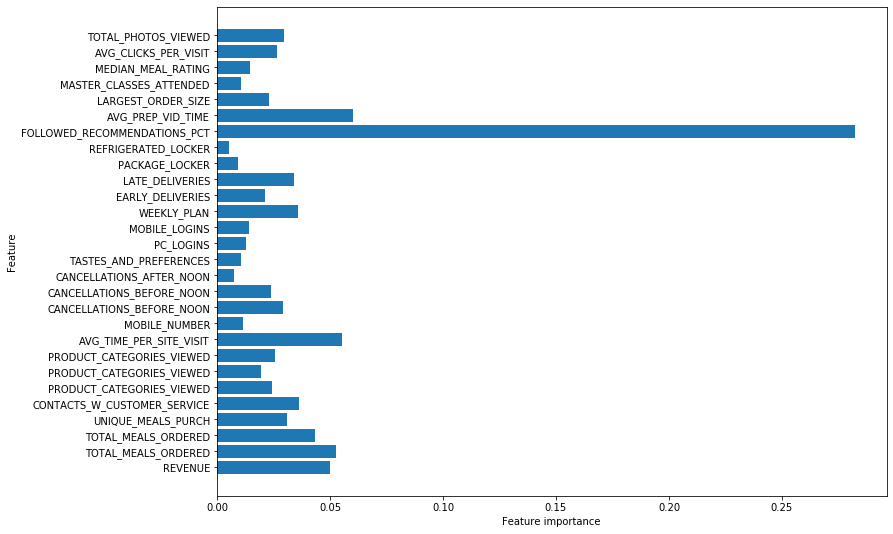

In [199]:
# plotting feature importance
plot_feature_importances(rf_default_full_fit,
                         train = X_train_full,
                         export = False)

# Random Forest with Tuned Hyperparameters

In [201]:
# declaring a hyperparameter space
estimator_space  = pd.np.arange(100, 1100, 250)
leaf_space       = pd.np.arange(1, 31, 10)
criterion_space  = ['gini', 'entropy']
bootstrap_space  = [True, False]
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'min_samples_leaf' : leaf_space,
              'criterion'        : criterion_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
full_forest_grid = RandomForestClassifier(random_state = 222)


# GridSearchCV object
full_forest_cv = GridSearchCV(estimator  = full_forest_grid,
                              param_grid = param_grid,
                              cv         = 3,
                              scoring    = make_scorer(roc_auc_score,
                                           needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_forest_cv.fit(original_df_dropped_data, original_df_dropped_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_forest_cv.best_params_)
print("Tuned Training AUC:", full_forest_cv.best_score_.round(4))

Tuned Parameters  : {'bootstrap': True, 'criterion': 'entropy', 'min_samples_leaf': 1, 'n_estimators': 100, 'warm_start': True}
Tuned Training AUC: 0.602


In [57]:
# INSTANTIATING the model object without hyperparameters
full_rf_tuned = RandomForestClassifier(bootstrap        = True,
                                       criterion        = 'gini',
                                       min_samples_leaf = 11,
                                       n_estimators     = 850,
                                       warm_start       = True,
                                       random_state     = 802)


# FIT step is needed as we are not using .best_estimator
full_rf_tuned_fit = full_rf_tuned.fit(X_train, y_train)


# PREDICTING based on the testing set
full_rf_tuned_pred = full_rf_tuned_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', full_rf_tuned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', full_rf_tuned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_rf_tuned_pred).round(4))

Training ACCURACY: 0.7964
Testing  ACCURACY: 0.7556
AUC Score        : 0.7321


In [ ]:
# declaring model performance objects
rf_train_acc = full_rf_tuned_fit.score(X_train, y_train).round(4)
rf_test_acc  = full_rf_tuned_fit.score(X_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = full_rf_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'Tuned Random Forest',
                          'Training Accuracy'  : rf_train_acc,
                          'Testing Accuracy'   : rf_test_acc,
                          'AUC Value'          : rf_auc},
                          ignore_index = True)


# checking the results
model_performance

# Gradient Boosted Machines

In [203]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 802)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(X_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(X_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.7978
Testing ACCURACY : 0.768
AUC Score        : 0.7564


In [204]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(X_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(X_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Value'          : gbm_auc},
                          ignore_index = True)


# checking the results
model_performance

,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Logistic Regression,0.7060,0.7269,0.6669
1,KNN Classification,0.7889,0.7741,0.7610
2,Full Tree,0.8197,0.7598,0.7419
3,Pruned Tree,0.7827,0.7844,0.7906
4,Tuned LR,0.7108,0.7084,0.6618
5,Tuned Tree,0.7868,0.7721,0.7612
6,Random Forest,0.8273,0.7248,0.6857
7,GBM,0.7978,0.7680,0.7564


To sum up as we can see the best model so far is Pruned tree with the AUC vaule of 0.791